In [1]:
from IPython.display import Image # for displaying screenshot of entity relationship diagram
import sqlite3 # for connecting to and querying SQL database

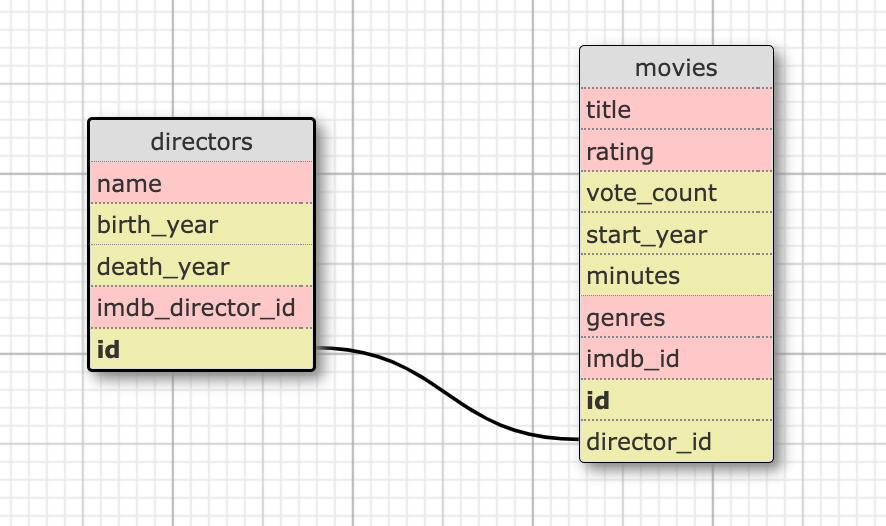

In [2]:
# entity relationship diagram for 'movies.sqlite' database
# two tables: 'directors' and 'movies'

# every table *must* have a primary id column
# each row in the table must have a unique indentifying primary key
# no repeating or null values allowed

# 'directors' primary key column = 'id'
# 'movies' primary key column = 'id'

# a table *can* also have foreign keys which link to another table
# by pointing to the other table's primary key or other unique key 
# can be repeated, can be null (if that row doesn't match up with any rows on the other table)

# 'movies' foreign key = 'director_id'
# connects to 'directors' primary key column 'id' for table links

Image('diagrams/movies_erd.png')

In [3]:
conn = sqlite3.connect('data/movies.sqlite') # connect to database
db = conn.cursor() # create cursor object which can perform sql commands

In [4]:
def directors_head(db):
    # return the first 5 rows in 'directors' table
    query = """
            SELECT *
            FROM directors
            LIMIT 5
            """
    # ^SQL query string
    # LIMIT number of rows returned
    # * selects all columns
    # FROM 'tablename' mandatory
    db.execute(query) # passed to 'execute()' method
    results = db.fetchall() # 'fetchall()' method used to retrieve all query results in a list
                            # useful when multiple rows expected as result
    return results

directors_head(db)


[('Georges Méliès', 1861, 1938, 'nm0617588', 1),
 ('Edwin S. Porter', 1870, 1941, 'nm0692105', 2),
 ('D.W. Griffith', 1875, 1948, 'nm0000428', 4),
 ('Robert Wiene', 1873, 1938, 'nm0927468', 5),
 ('Charles Chaplin', 1889, 1977, 'nm0000122', 13)]

In [5]:
def directors_count(db):
    # return the number of directors contained in the database
    query = """
            SELECT COUNT(*)
            FROM directors
            """
    # aggregate functions (COUNT, MIN, MAX, AVG) work on whole column to return one value
    db.execute(query)
    results = db.fetchone() # 'fetchone()' method used to retreive just one result
                            # useful when just one item expected as result (like a count total)
                    
    return results[0]

directors_count(db)


4089

In [6]:
def movies_head(db):
    # return the first 3 rows in 'movies' table
    query = """
            SELECT *
            FROM movies
            LIMIT 3
            """
    db.execute(query)
    results = db.fetchall()
    return results

movies_head(db)

[('A Trip to the Moon',
  '8.2',
  39710,
  1902,
  13,
  'Action,Adventure,Comedy',
  'tt0000417',
  1,
  1),
 ('The Great Train Robbery',
  '7.3',
  15526,
  1903,
  11,
  'Action,Crime,Short',
  'tt0000439',
  2,
  2),
 ('The Birth of a Nation',
  '6.4',
  20774,
  1915,
  195,
  'Drama,History,War',
  'tt0004972',
  3,
  4)]

In [7]:
def movies_count(db):
    # return the number of movies contained in the database
    query = """
            SELECT COUNT(*)
            FROM movies
            """
    db.execute(query)
    results = db.fetchone()
    return results[0]

movies_count(db)

9875

In [8]:
def directors_list(db):
    # return the list of all the directors sorted in alphabetical order 
    query = """
            SELECT directors.name
            FROM directors
            ORDER BY directors.name ASC
            """
    # SELECT 'tablename.columname'(fully qualified name) to select one column
    # ORDER BY column name to sort results by 
    # ASC = ascending order, DESC = descending order (default is ascending)
    db.execute(query)
    results = db.fetchall()
    director_list = []
    for result in results:
        director_list.append(result[0])
    return director_list[:10] # (limit first 10 for display) 
                              # note the query itself returned the full list (no LIMIT clause) 
                              # just limiting here after the fact with string slicing
                              # also note query leaves original table/database intact
                              # ORDER BY (and all other clauses) just effect returned query results
                              # (except for specific commands like 'UPDATE'/'UPDATE' not covered here)

directors_list(db)

['A.R. Murugadoss',
 'Aamir Khan',
 'Aanand L. Rai',
 'Aaron Hann',
 'Aaron Harvey',
 'Aaron Horvath',
 'Aaron Lipstadt',
 'Aaron Moorhead',
 'Aaron Schneider',
 'Aaron Seltzer']

In [9]:
def love_movies(db):
    # return the list of all movies which contain the exact word "love" in their title, sorted in alphabetical order
    query = """
        SELECT title
        FROM movies
        WHERE UPPER(title) LIKE '% LOVE %'
        OR UPPER(title) LIKE 'LOVE %'
        OR UPPER(title) LIKE '% LOVE'
        OR UPPER(title) LIKE 'LOVE'
        OR UPPER(title) LIKE '% LOVE''%'
        OR UPPER(title) LIKE '% LOVE.'
        OR UPPER(title) LIKE 'LOVE,%'
        ORDER BY title
        """
    # for simple searches of one table, can just SELECT 'columnname' instead of 'tablename.columnname'
    # WHERE clause used for filtering, can include logical operators (OR,AND,IN,NOT)
    # blank spaces count in LIKE pattern search
    # % wildcard means 0,1 or more of any char
    # UPPER(title) converts title to uppercase before pattern search to make it case-agnostic 
    # thus, query will match and return 'i love you' but not 'glove'
    db.execute(query)
    results = db.fetchall()
    movie_list = []
    for result in results:
        movie_list.append(result[0])
    return movie_list[:10]     #(limit first 10 for display)

love_movies(db)

['A Lot Like Love',
 'A Love Song for Bobby Long',
 'A Short Film About Love',
 'Addicted to Love',
 'All the Boys Love Mandy Lane',
 'American Pie Presents: The Book of Love',
 'Big Love',
 "Can't Buy Me Love",
 'Capitalism: A Love Story',
 'Crazy, Stupid, Love.']

In [10]:
def directors_named_like_count(db, name):
    # return the number of directors which contain a given word in their name
    query = """
            SELECT COUNT(directors.name)
            FROM directors
            WHERE UPPER(directors.name) LIKE ?
            """
    # counting number of rows that match a LIKE pattern search
    # instead of formating the query string directly...
    # ? placeholder used for parameter substitution, protects against SQL injection attacks.
    params = (f"%{name}%",) # formatted string of user input assigned to 'params' tuple
    db.execute(query, params) # 'params' passed after query as 'execute()' method's second argument
                              # equivalent of 'WHERE UPPER(directors.name) LIKE {%name%}' but safer 
    results = db.fetchone()
    return results[0]

directors_named_like_count(db, 'cat') # number of directors with 'cat' in their name! (like 'Sam Catlin')

8

In [11]:
def movies_longer_than(db, min_length):
    # return list of all movies which are longer than a given duration, sorted in alphabetical order
    query = f"""
            SELECT movies.title
            FROM movies
            WHERE movies.minutes > ?
            ORDER BY movies.title ASC
            """
    # WHERE can filter based on <,>,= comparisons too, not just string pattern matches
    params = (min_length,)
    db.execute(query, params)
    results = db.fetchall()
    movie_list = []
    for result in results:
        movie_list.append(result[0])
    return movie_list

movies_longer_than(db, 500)

['Band of Brothers',
 'Cosmos',
 'Dekalog',
 'I, Claudius',
 'Jackass',
 'Neon Genesis Evangelion',
 'Planet Earth',
 'Roots',
 'Taken',
 'The Civil War',
 'The Godfather Trilogy: 1901-1980',
 'The Kingdom',
 'The Night Of',
 'The Pacific',
 'The Staircase',
 'The Vietnam War',
 'The Young Pope']

In [12]:
def detailed_movies(db):
    # return the list of movies with their genres and director name
    query = """
        SELECT
            movies.title,
            movies.genres,
            directors.name
        FROM movies
        JOIN directors ON movies.director_id = directors.id
    """
    # JOIN combines column of data from 2 or more tables based on given key 
    # leaves original tables/database intact, just affects the query results
    # in this case joining columns where 'movies' foreign key 'director_id' matches 'directors' primary key 'id'
    # thus matching up movies with their respective directors
    # JOIN defaults as INNER JOIN, only keeping rows where there is a match (more on different types of joins later)
    # multiple columns can be selected by seperating each column name with a comma
    # must use fully qualified name (tablename.columnname) with JOIN so query knows which column comes from which table!
    db.execute(query)
    movies = db.fetchall()
    return movies[:10] # (limit first 10 for display)

detailed_movies(db)

[('A Trip to the Moon', 'Action,Adventure,Comedy', 'Georges Méliès'),
 ('The Great Train Robbery', 'Action,Crime,Short', 'Edwin S. Porter'),
 ('The Birth of a Nation', 'Drama,History,War', 'D.W. Griffith'),
 ("Intolerance: Love's Struggle Throughout the Ages",
  'Drama,History',
  'D.W. Griffith'),
 ('The Cabinet of Dr. Caligari', 'Fantasy,Horror,Mystery', 'Robert Wiene'),
 ('The Kid', 'Comedy,Drama,Family', 'Charles Chaplin'),
 ('The Gold Rush', 'Adventure,Comedy,Drama', 'Charles Chaplin'),
 ('The Circus', 'Comedy,Romance', 'Charles Chaplin'),
 ('City Lights', 'Comedy,Drama,Romance', 'Charles Chaplin'),
 ('Modern Times', 'Comedy,Drama,Family', 'Charles Chaplin')]

In [13]:
def late_released_movies(db):
    # return the list of all movies released after their director death'''
    query = """
        SELECT movies.title
        FROM directors
        JOIN movies ON directors.id = movies.director_id
        WHERE (movies.start_year - directors.death_year) > 0
        ORDER BY movies.title
    """
    # JOIN tables then filter rows on WHERE clause 
    # WHERE clause can include arithmetic operators like +,-,/,*
    # WHERE clause can operate on columns from different tables 
    db.execute(query)
    movies = db.fetchall()
    return [movie[0] for movie in movies]

late_released_movies(db)

['Cars',
 'Fantasia 2000',
 'Game of Death',
 'The Many Adventures of Winnie the Pooh',
 'The Rescuers',
 'Waitress']

In [14]:
def stats_on(db, genre_name):
    '''return a dict of stats for a given genre'''
    query = """
        SELECT
            genres,
            COUNT(*),
            ROUND(AVG(minutes), 2)
        FROM movies
        WHERE genres = ?
    """
    # WHERE filters down to just rows where genre matches user's input
    # COUNT aggregates number of rows (i.e. movies) 
    # AVG aggregates average value in 'minutes' column (i.e. avg length)
    params = (genre_name,)
    db.execute(query, params)
    stat = db.fetchone()
    return {
        "genre": stat[0],
        "number_of_movies": stat[1],
        "avg_length": stat[2]
    }

stats_on(db, 'Comedy')

{'genre': 'Comedy', 'number_of_movies': 367, 'avg_length': 82.69}

In [15]:
def top_five_directors_for(db, genre_name):
    '''return the top 5 of the directors with the most movies for a given genre'''
    query = """
        SELECT
            directors.name,
            COUNT(*) AS movie_count
        FROM movies
        JOIN directors ON movies.director_id = directors.id
        WHERE movies.genres = ?
        GROUP BY directors.name
        ORDER BY movie_count DESC, directors.name
        LIMIT 5
    """
    # GROUP BY groups rows that have the same value in the specified column, in this case same director's name
    # most often used for performing aggregate functions grouped by column value 
    # in this case COUNT aggregates number of rows (i.e. movies) grouped by director 
    # WHERE clause filters to genre matching user's input
    # (without WHERE clause would return top 5 directors with most movies across *all* genres)
    # (interestingly, Woody Allen would still be on top, but with 45 movies instead of 8!)
    params = (genre_name,)
    db.execute(query, params)
    directors = db.fetchall()
    return directors

top_five_directors_for(db, 'Comedy')

[('Woody Allen', 8),
 ('Togan Gökbakar', 5),
 ('Andy Ackerman', 4),
 ('Dennis Dugan', 4),
 ('Jay Chandrasekhar', 4)]

In [16]:
def movie_duration_buckets(db):
    '''return the movie counts grouped by buckets of 30 min duration'''
    query = """
        SELECT
            (minutes/30 + 1)*30 AS time_range,
            COUNT(*)
        FROM movies
        WHERE minutes IS NOT NULL
        GROUP BY time_range
    """
    # 'SELECT ... AS' clause creates a new column named 'time_range' (just for the query results, leaves original tables/database intact)
    # 'time_range' contains ints returned by (minutes/30 + 1)*30 equation applied to values in 'minutes' column
    # movies 0-30 minutes long return 1 to 'time_range', 31-60 minutes long return 2, 61-90 long return 3, etc.
    # these time ranges are in effect buckets grouping the movies by duration into 30 minute intervals
    # GROUP BY 'time_range' and COUNT(*) aggregates number of rows (i.e. movies) in each bucket. 
    # thus 292 movies are 0-30 minutes long, 764 are 31-60 minutes long, 1362 are 61-90 minutes long, etc.
    # 'WHERE minutes IS NOT NULL' filters out movies whose duration are not recorded in the database (NULL values in 'minutes' column)
    return db.execute(query).fetchall()

movie_duration_buckets(db)


[(30, 292),
 (60, 764),
 (90, 1362),
 (120, 5302),
 (150, 1617),
 (180, 331),
 (210, 88),
 (240, 19),
 (270, 7),
 (300, 11),
 (330, 4),
 (360, 7),
 (390, 7),
 (420, 4),
 (450, 4),
 (480, 2),
 (540, 4),
 (570, 3),
 (600, 4),
 (630, 2),
 (690, 2),
 (900, 1),
 (1020, 1)]

In [17]:
def top_five_youngest_newly_directors(db):
    '''return the top 5 youngest directors when they direct their first movie'''
    query = """
        SELECT
            directors.name,
            movies.start_year - directors.birth_year AS age
        FROM directors
        JOIN movies ON directors.id = movies.director_id
        GROUP BY directors.name
        HAVING age IS NOT NULL
        ORDER BY age
        LIMIT 5
    """
    # '... AS age' creates a new column named 'age'
    # 'age' contains ints returned by movies.start_year - directors.birth_year (i.e. the director's age when the movie came out)
    # results sorted by 'age' column (default ascending) and limited to 5, so 5 youngest directors returned
    # 'HAVING age IS NOT NULL' filters out rows where 'age' column NULL, due to either 'movies.start_year' or 'directors.birth_year' missing
    # HAVING similar to WHERE, filters results. But HAVING can be used on aggregated data, i.e. after GROUP BY, while HAVING cannot
    # in other words, WHERE acts as pre-filter and HAVING acts as a post-filter
    db.execute(query)
    directors = db.fetchall()
    return directors

top_five_youngest_newly_directors(db)


[('Adam Paloian', 8),
 ('Alfonso Ribeiro', 19),
 ('Kenn Navarro', 20),
 ('Xavier Dolan', 20),
 ('Albert Hughes', 21)]